In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

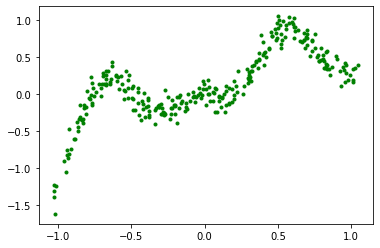

In [3]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [4]:
# ## Binary labeled data

# x = np.linspace(0,1,300)
# y= np.where(x<0.25, -0.5, 1)

# noise = np.random.normal(0,0.02, x.shape)

# x = x + noise
# noise = np.random.normal(0,0.1, x.shape)
# y = y + noise

# indx = np.argsort(x)
# x = x[indx]
# y = y[indx]

# x = x*2
# x = x - x.mean() # good practice to zero-center x in linear mapping
# xx = x.reshape(-1,1)
# yy = y.reshape(-1,1)

# %matplotlib inline
# plt.scatter(x, y, marker='.', color='g')
# plt.show()

## Find best split with gradient descent -- scale error around break point with gaussian

In [48]:
optim = tnn.Adam()
linear = tnn.LinearLayer(1,1,optimizer=optim)

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

gaussian = tnn.Gaussian()

In [49]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
    
    mask0 = lout>0 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dlout = dy0*c0*mask0 + dy1*c1*mask1
#     dx = linear.backward(dlout*err_scaler)
    dx = linear.backward(dy*err_scaler)
    
    linear.update()
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1
    
#     if np.count_nonzero(mask0)==0 or np.count_nonzero(mask1)==0:
#         print("Mask error")
#     c0 = np.mean(yy[mask0])
#     c1 = np.mean(yy[mask1])
    
    dy = yout - yy
    
    if epoch%10 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dy*err_scaler).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.21394680860001145


10 Error =  0.1679949084600871


20 Error =  0.13922026339587035


30 Error =  0.13139646174970238


40 Error =  0.17497699703545322


50 Error =  0.19792523706299184


60 Error =  0.19701926750514406


70 Error =  0.19686320156137826


80 Error =  0.19616454534799804


90 Error =  0.1962136729690255


100 Error =  0.19611347384532365


110 Error =  0.19611889952126224


120 Error =  0.19610798340953142


130 Error =  0.19610736012900357


140 Error =  0.19610669439298067


150 Error =  0.1961062817678197


160 Error =  0.24197825327052191


170 Error =  0.2290941130954572


180 Error =  0.19442611928146847


190 Error =  0.14931365522981838


200 Error =  0.12585925575691137


210 Error =  0.11847389593356511


220 Error =  0.11854178585600955


230 Error =  0.11844172876872183


240 Error =  0.11853530509795993


250 Error =  0.11847754932235963


260 Error =  0.11947844136436629


270 Error =  0.11947762724624236


280 Error =  0.11947434742769232






2330 Error =  0.10255288677503804


2340 Error =  0.10255286689875082


2350 Error =  0.1025528497544956


2360 Error =  0.10255284950068186


2370 Error =  0.10129334287600543


2380 Error =  0.10129625478741427


2390 Error =  0.10255762025799467


2400 Error =  0.10256197590615203


2410 Error =  0.1012934745944747


2420 Error =  0.10129326251388761


2430 Error =  0.10129326313925456


2440 Error =  0.10129326305008118


2450 Error =  0.1012932626473183


2460 Error =  0.1012932622434111


2470 Error =  0.10087746797151041


2480 Error =  0.10087660007299844


2490 Error =  0.10087687316826056


2500 Error =  0.1012957196021548


2510 Error =  0.10087519478696244


2520 Error =  0.10087491897797225


2530 Error =  0.1008752414885419


2540 Error =  0.10087496304337702


2550 Error =  0.10087461905081242


2560 Error =  0.10129939042804578


2570 Error =  0.10087457155415298


2580 Error =  0.10087456741107668


2590 Error =  0.10087456432967518


2600 Error =  0.1008745637212943



4630 Error =  0.09676921269596571


4640 Error =  0.09676927703075182


4650 Error =  0.09676923832257632


4660 Error =  0.09676920668142294


4670 Error =  0.09676920848099312


4680 Error =  0.09676920760820468


4690 Error =  0.0967692061672321


4700 Error =  0.09676920612522097


4710 Error =  0.09676920613925832


4720 Error =  0.09676920608331642


4730 Error =  0.09676920607202068


4740 Error =  0.09676920607387463


4750 Error =  0.09676920607264475


4760 Error =  0.09676920607177456


4770 Error =  0.09676920607174913


4780 Error =  0.09676920607176437


4790 Error =  0.09676920607173407


4800 Error =  0.09676920607172322


4810 Error =  0.09676920607172357


4820 Error =  0.09676920607172361


4830 Error =  0.09676920607172314


4840 Error =  0.09676920607172299


4850 Error =  0.09676920607172299


4860 Error =  0.09676920607172299


4870 Error =  0.09676920607172297


4880 Error =  0.09676920607172299


4890 Error =  0.09676920607172299


4900 Error =  0.09676920607



6930 Error =  0.09155666719786945


6940 Error =  0.09275092798102613


6950 Error =  0.0915567482836279


6960 Error =  0.0927442361042562


6970 Error =  0.09274347625132279


6980 Error =  0.09155892705092245


6990 Error =  0.09274397094932593


7000 Error =  0.09155591573498881


7010 Error =  0.0927397551999244


7020 Error =  0.09273994694075337


7030 Error =  0.09155492816827408


7040 Error =  0.09155664855912984


7050 Error =  0.09155892964819619


7060 Error =  0.09156024222707586


7070 Error =  0.09274110510116065


7080 Error =  0.09155634733551504


7090 Error =  0.09155556405075903


7100 Error =  0.09155690082413931


7110 Error =  0.09155865853936371


7120 Error =  0.09275054963434232


7130 Error =  0.09156258445568603


7140 Error =  0.09273622581046108


7150 Error =  0.0915549558005356


7160 Error =  0.09155777236608245


7170 Error =  0.09156465349355157


7180 Error =  0.09155542111718555


7190 Error =  0.0915555725711173


7200 Error =  0.092738568971816



9230 Error =  0.092747568916866


9240 Error =  0.09155515769261903


9250 Error =  0.09274371559271175


9260 Error =  0.09155884928932738


9270 Error =  0.09155587481365245


9280 Error =  0.09155703465473675


9290 Error =  0.09274664771252418


9300 Error =  0.09155627704412345


9310 Error =  0.09155577527457744


9320 Error =  0.0915560324624974


9330 Error =  0.09274772793465358


9340 Error =  0.09155842851914807


9350 Error =  0.09274771234392912


9360 Error =  0.09155747833648105


9370 Error =  0.09274760799867857


9380 Error =  0.0915553105036902


9390 Error =  0.09155572188708837


9400 Error =  0.09274691647165528


9410 Error =  0.09155877772552645


9420 Error =  0.09274750564569223


9430 Error =  0.09155687017172172


9440 Error =  0.09155666087700744


9450 Error =  0.0927494111573961


9460 Error =  0.09155511712725113


9470 Error =  0.09155624672425086


9480 Error =  0.09155488963107461


9490 Error =  0.09155725038196584


9500 Error =  0.092749518499464



11490 Error =  0.09155501257168314


11500 Error =  0.09155687962552399


11510 Error =  0.0927414261488472


11520 Error =  0.09156108024713033


11530 Error =  0.09274969622270766


11540 Error =  0.09155634804701812


11550 Error =  0.09274129196328819


11560 Error =  0.09155721783563386


11570 Error =  0.09274353402621133


11580 Error =  0.09274121254191285


11590 Error =  0.09155497818433626


11600 Error =  0.09274115529429468


11610 Error =  0.09155956618808572


11620 Error =  0.09155638391997697


11630 Error =  0.09274735641071709


11640 Error =  0.0915578920445844


11650 Error =  0.09274262864713322


11660 Error =  0.0915564622410138


11670 Error =  0.09155578755283375


11680 Error =  0.09155802614859891


11690 Error =  0.09274675087423652


11700 Error =  0.09156708528832334


11710 Error =  0.09156403449348911


11720 Error =  0.09155893277849741


11730 Error =  0.09155816569974914


11740 Error =  0.09274344633461122


11750 Error =  0.09155632348188443


11



13720 Error =  0.09274433895146462


13730 Error =  0.0927424146636422


13740 Error =  0.0915592093388572


13750 Error =  0.09155498929614998


13760 Error =  0.09155789639056378


13770 Error =  0.0915566426226511


13780 Error =  0.09155768863668223


13790 Error =  0.09155859001424091


13800 Error =  0.09274170672118474


13810 Error =  0.0915584092266964


13820 Error =  0.09155508622399343


13830 Error =  0.09274470791340966


13840 Error =  0.0927449781638205


13850 Error =  0.09275096102130737


13860 Error =  0.09155724667639244


13870 Error =  0.09155787868430658


13880 Error =  0.09156121901378503


13890 Error =  0.0927445407090309


13900 Error =  0.09275664157969117


13910 Error =  0.09156001458359211


13920 Error =  0.09156734875846233


13930 Error =  0.09155551214096372


13940 Error =  0.09155545041490425


13950 Error =  0.09274217697488683


13960 Error =  0.09156008533292881


13970 Error =  0.09155499788421242


13980 Error =  0.09274503421282415


13990

15950 Error =  0.09155884210663695


15960 Error =  0.09156655974602555


15970 Error =  0.09155515201450608


15980 Error =  0.09155719446924299


15990 Error =  0.09274909492847469


16000 Error =  0.09275802582521102


16010 Error =  0.09155556421162404


16020 Error =  0.09275080901455889


16030 Error =  0.09155745096563607


16040 Error =  0.09274846728963647


16050 Error =  0.0915575540542357


16060 Error =  0.09274896626317901


16070 Error =  0.0915640737460953


16080 Error =  0.0915611468876198


16090 Error =  0.0915555766561938


16100 Error =  0.0915586860529972


16110 Error =  0.09156091577249446


16120 Error =  0.09274306411679367


16130 Error =  0.09155580367952787


16140 Error =  0.09274452070232636


16150 Error =  0.09155751216202002


16160 Error =  0.09274594622530116


16170 Error =  0.09155857409203742


16180 Error =  0.0915555516055232


16190 Error =  0.09155590887640351


16200 Error =  0.0927429617712691


16210 Error =  0.09274013600369413


16220 Er



18190 Error =  0.0915583410393875


18200 Error =  0.09155741022821808


18210 Error =  0.09155914304160857


18220 Error =  0.0915557860126957


18230 Error =  0.09155816803761783


18240 Error =  0.09155575785073966


18250 Error =  0.09155870694501156


18260 Error =  0.0915559950095913


18270 Error =  0.09155883522651946


18280 Error =  0.0927409975592315


18290 Error =  0.09155666341935273


18300 Error =  0.09274963929760706


18310 Error =  0.09155814761763292


18320 Error =  0.09155481603695768


18330 Error =  0.0927453157502583


18340 Error =  0.09155696889685548


18350 Error =  0.09274472542075925


18360 Error =  0.0915596324838223


18370 Error =  0.09155516331670258


18380 Error =  0.09155766255131166


18390 Error =  0.09274273833101496


18400 Error =  0.09156086757291595


18410 Error =  0.0915550851044199


18420 Error =  0.092738557961961


18430 Error =  0.09274119541131136


18440 Error =  0.09155580222001733


18450 Error =  0.09274350574980188


18460 Er



20430 Error =  0.0915556914135528


20440 Error =  0.09274230266253117


20450 Error =  0.09155987169416747


20460 Error =  0.09155611790986307


20470 Error =  0.09276413063887105


20480 Error =  0.09155555818363686


20490 Error =  0.09275352539374362


20500 Error =  0.09155707616744191


20510 Error =  0.09274256711741985


20520 Error =  0.09155886596266172


20530 Error =  0.09274326618107617


20540 Error =  0.09155870675636658


20550 Error =  0.09155789921732256


20560 Error =  0.09274325509638488


20570 Error =  0.09155981196234056


20580 Error =  0.09274524535194772


20590 Error =  0.09155887970353042


20600 Error =  0.09274557269190481


20610 Error =  0.09155756275284797


20620 Error =  0.09274216960213262


20630 Error =  0.09155984834840351


20640 Error =  0.09155861075546486


20650 Error =  0.09274275153354193


20660 Error =  0.09155980762712668


20670 Error =  0.09274539541385143


20680 Error =  0.09155870343226184


20690 Error =  0.09274572879337262






22660 Error =  0.09155494741505744


22670 Error =  0.09155859076403937


22680 Error =  0.09274221826323183


22690 Error =  0.09155685189710049


22700 Error =  0.09155681522481568


22710 Error =  0.09155878236211033


22720 Error =  0.09155741238800577


22730 Error =  0.09156327739096448


22740 Error =  0.09156297625312816


22750 Error =  0.0915552268526924


22760 Error =  0.09155566160613206


22770 Error =  0.09273899005524439


22780 Error =  0.09155931045693458


22790 Error =  0.0927438627806631


22800 Error =  0.09155769365530483


22810 Error =  0.0927422215465744


22820 Error =  0.09155939798890148


22830 Error =  0.09155838375355123


22840 Error =  0.09274253509746998


22850 Error =  0.09155972959387182


22860 Error =  0.09274528435352719


22870 Error =  0.09155724543242286


22880 Error =  0.09274981629530756


22890 Error =  0.09156111868416651


22900 Error =  0.09155954042940882


22910 Error =  0.0915549098135268


22920 Error =  0.0927478094668383


2293

TclError: invalid command name "pyimage184"

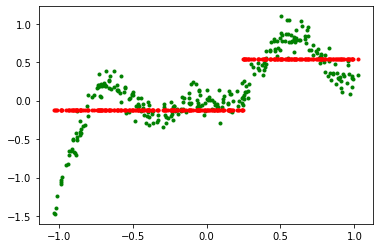

In [50]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [51]:
error, linear.weights, linear.bias

(0.09155536310617467, array([[4.19273708]]), array([-1.02283015]))

In [52]:
np.count_nonzero(mask0), np.count_nonzero(mask1)

(114, 186)

In [9]:
'''
This problem needs different type of gradient
* We can move the decision boundary using gaussian based optimization.
* The decision boundary looks at the two sides of it (locally)
* The error is calculated as the resulting shift that 
'''

'\nThis problem needs different type of gradient\n* We can move the decision boundary using gaussian based optimization.\n* The decision boundary looks at the two sides of it (locally)\n* The error is calculated as the resulting shift that \n'

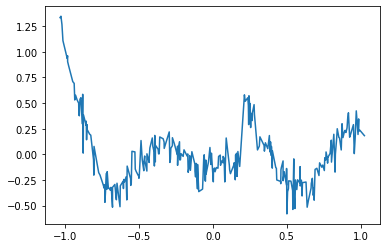

In [9]:
plt.plot(x,dy)

In [10]:
gaussian = tnn.Gaussian()

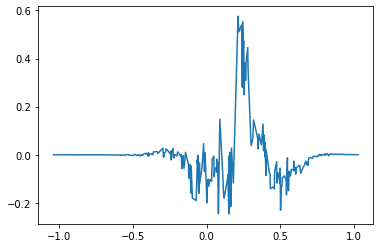

In [11]:
plt.plot(x, gaussian.forward(lout)*dy)

In [12]:
(gaussian.forward(lout)*dy).mean()

1.3633992552515295e-05

## Sigmoid based,, it has gaussian gradient scaling

In [46]:
optim = tnn.Adam()
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

In [47]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dlout = dy0*c0*mask0 + dy1*c1*mask1
#     dx = linear.backward(dlout*err_scaler)
    dx = linear.backward(sigmoid.backward(dy/0.25))
#     dx = linear.backward(dy)#/0.25)
    
    linear.update()
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1

#     if np.count_nonzero(mask0)==0 or np.count_nonzero(mask1)==0:
#         print("Mask error")
#     c0 = np.mean(yy[mask0])
#     c1 = np.mean(yy[mask1])

#     dy = yout - yy
#     dx = linear.backward(dy)
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, sigmoid.backward(dy).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.21394680860001145


100 Error =  0.19610970946071882


200 Error =  0.19610623757135637


300 Error =  0.12189769790014438


400 Error =  0.12188566769689502


500 Error =  0.1218844889717685


600 Error =  0.12188448889834909


700 Error =  0.12005405339396963


800 Error =  0.11847396639222575


900 Error =  0.11809716384714823


1000 Error =  0.11725247656001025


1100 Error =  0.11672970172236181


1200 Error =  0.11527612923334658


1300 Error =  0.11426099525894438


1400 Error =  0.11361314701699712


1500 Error =  0.11280792927553179


1600 Error =  0.11118662144021461


1700 Error =  0.1111919401669381


1800 Error =  0.11015549074686537


1900 Error =  0.1091787636241613


2000 Error =  0.10910382119483636


2100 Error =  0.1091034781678132


2200 Error =  0.10910347533527352


2300 Error =  0.1073164134876185


2400 Error =  0.10731641206716927


2500 Error =  0.1063416709738546


2600 Error =  0.10557561515257459


2700 Error =  0.10557471135542025


2800 Error



22700 Error =  0.09910374551375392


22800 Error =  0.09909784277235016


22900 Error =  0.09910070040290969


23000 Error =  0.0990974560961763


23100 Error =  0.09910222896429502


23200 Error =  0.09952583702001376


23300 Error =  0.09909776500290782


23400 Error =  0.09952157067762325


23500 Error =  0.09909859903580567


23600 Error =  0.09910040693705914


23700 Error =  0.09910150364250689


23800 Error =  0.0990979443599257


23900 Error =  0.09909776337285196


24000 Error =  0.09909770470940568


24100 Error =  0.09909742628695638


24200 Error =  0.09909787277440807


24300 Error =  0.09909981932720698


24400 Error =  0.09952168977930517


TclError: invalid command name "pyimage173"

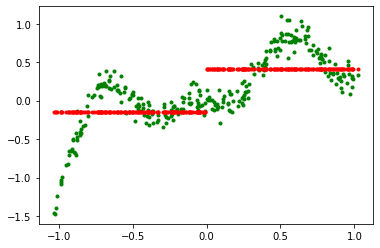

In [15]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [19]:
linear.weights, linear.bias

(array([[92.70974508]]), array([0.47208791]))

## Greedy best split

In [53]:
splits = np.linspace(-1, 1, num=5000)

In [54]:
def measure_split(split):
    mask = xx<split
    y1 = yy[mask]
    y2 = yy[~mask]
    
    out = np.empty_like(yy)
    out[mask] = y1.mean()
    out[~mask] = y2.mean()
    
    error = ((out-yy)**2).mean()
    
    return out, error

In [55]:
best_out = None
best_split = None
best_error = 9e9
for split in splits:
    out, error = measure_split(split)
    if error<best_error:
        best_error = error
        best_split = split
        best_out = out

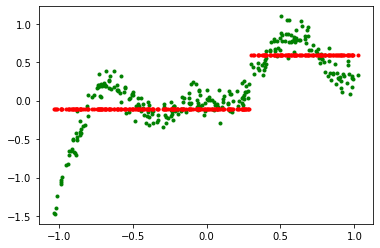

In [56]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, best_out.reshape(-1), color='r', marker='.')

In [57]:
best_error

0.08667247465443653

## Sigmoid based - Hard and soft combine

In [58]:
import copy

In [64]:
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

In [65]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    ## With splits
    lout = linear.forward(xx)
    
    mask0 = lout>0
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
    lout = dy0*c0*mask0 + dy1*c1*mask1
    dx = linear.backward(lout)
    
#     linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    c0 = np.mean(yy[mask0])
    c1 = np.mean(yy[mask1])
    yy_disc = np.empty_like(yy)
    yy_disc[mask0] = c0
    yy_disc[mask1] = c1

#     yy_disc = copy.deepcopy(yout)
    
    #### With sigmoid
    lout = sigmoid.forward(linear.forward(xx))   
       
    y0 = c0*lout
    y1 = c1*(1-lout)
    
    yout = y0 + y1
    
    dy = yout - yy_disc
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(lout)
    dc1 = dy1*(1-lout)
    
    dlout = dy0*c0 - dy1*c1
    dx = linear.backward(sigmoid.backward(dlout))
    
    linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    
#     lout = linear.forward(xx)
#     mask0 = lout>0
#     mask1 = ~mask0    
#     y0 = c0*mask0
#     y1 = c1*mask1
#     yout = y0 + y1
    dy = yout-yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
#         if error < 0.00025:
#             print('fitted to our expectation')
#             break

0 Error =  0.17699598610128414


100 Error =  0.14278921946515052


200 Error =  0.12688468697613625


300 Error =  0.11878449439601821


400 Error =  0.11408522437693554


500 Error =  0.11109165948012162


600 Error =  0.10906066805004372


700 Error =  0.10762307692744633


800 Error =  0.10657632646773413


900 Error =  0.10580033436390948


1000 Error =  0.10521944381031859


1100 Error =  0.10478360827492869


1200 Error =  0.10445838370330447


1300 Error =  0.10421927496716499


1400 Error =  0.10404837742792782


1500 Error =  0.10393229537033709


1600 Error =  0.10386080423615844


1700 Error =  0.10382596360614957


1800 Error =  0.10382151286872988


1900 Error =  0.10384244957239389


2000 Error =  0.10388472899524674


2100 Error =  0.10394504605146727


2200 Error =  0.10402067430490645


2300 Error =  0.10410934533913642


2400 Error =  0.10420915713153701


2500 Error =  0.10431850359315147


2600 Error =  0.104436019770277


2700 Error =  0.10456053878297378


2800 E



22700 Error =  0.11615752374451968


22800 Error =  0.11616450656636815


22900 Error =  0.11617142300626943


23000 Error =  0.11617827408900389


23100 Error =  0.11618506081756548


23200 Error =  0.11619178417374873


23300 Error =  0.11619844511871709


23400 Error =  0.11620504459355246


23500 Error =  0.1162115835197873


23600 Error =  0.11621806279991996


23700 Error =  0.11622448331791302


23800 Error =  0.11623084593967642


23900 Error =  0.11623715151353532


24000 Error =  0.11624340087068302


24100 Error =  0.1162495948256201


24200 Error =  0.11625573417657989


24300 Error =  0.11626181970594086


24400 Error =  0.11626785218062631


24500 Error =  0.11627383235249197


24600 Error =  0.11627976095870181


24700 Error =  0.11628563872209265


24800 Error =  0.1162914663515276


24900 Error =  0.11629724454223923


25000 Error =  0.11630297397616242


25100 Error =  0.11630865532225745


25200 Error =  0.11631428923682335


25300 Error =  0.11631987636380269


25

TclError: invalid command name "pyimage231"

In [ ]:
dy

### Stochastic sigmoid training

In [61]:
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

In [62]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    ## With splits
    lout = linear.forward(xx)
    mask0 = lout>0
    mask1 = ~mask0    
    yout = c0*mask0 + c1*mask1
    
    c0 = np.mean(yy[mask0])
    c1 = np.mean(yy[mask1])
    yy_disc = np.empty_like(yy)
    yy_disc[mask0] = c0
    yy_disc[mask1] = c1

    #### With sigmoid
    lout = sigmoid.forward(linear.forward(xx))
    lout = np.array([np.random.binomial(1, p) for p in lout])
       
    y0 = c0*lout
    y1 = c1*(1-lout)
    
    yout = y0 + y1
    
    dy = yout - yy_disc
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(lout)
    dc1 = dy1*(1-lout)
    
    dlout = dy0*c0 - dy1*c1
    dx = linear.backward(sigmoid.backward(dlout))
    
    linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    
#     lout = linear.forward(xx)
#     mask0 = lout>0
#     mask1 = ~mask0    
#     y0 = c0*mask0
#     y1 = c1*mask1
#     yout = y0 + y1
    dy = yout-yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
#         if error < 0.00025:
#             print('fitted to our expectation')
#             break

0 Error =  0.22196094257494528


100 Error =  0.20560557388925096


200 Error =  0.18998930905918363


300 Error =  0.16964860388830186


400 Error =  0.16696345057356937


500 Error =  0.13571758140712806


600 Error =  0.15366269577678462


700 Error =  0.15568321803864701


800 Error =  0.13642277356008664


900 Error =  0.12190423021235267


1000 Error =  0.13531238002447085


1100 Error =  0.12651567546971212


1200 Error =  0.14736332958306722


1300 Error =  0.11807576938973478


1400 Error =  0.12973170289610353


1500 Error =  0.12566334735872803


1600 Error =  0.12520814170889266


1700 Error =  0.11252836996725915


1800 Error =  0.11462888799475972


1900 Error =  0.11140639315266275


2000 Error =  0.11371140260408823


2100 Error =  0.11347926852994245


2200 Error =  0.11285965418912769


2300 Error =  0.11464187214091266


2400 Error =  0.10765360094507935


2500 Error =  0.11772577446382916


2600 Error =  0.10929229363374793


2700 Error =  0.11576010803337568


2800

TclError: invalid command name "."

In [ ]:
lout

### Testing on binary data

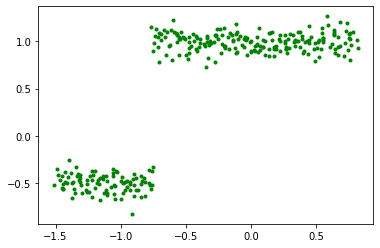

In [19]:
np.random.seed(13)
x = np.linspace(-1.5,0.8,300)
msk = x<-0.75
y = np.zeros_like(x)
y[msk] = -0.5
y[~msk] = 1

noise = np.random.normal(0,0.02, x.shape)
x = x + noise

indx = np.argsort(x)
x = x[indx]
y = y[indx]

noise = np.random.normal(0,0.1, x.shape)
y = y + noise

xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

### Training

In [22]:
# optim = tnn.Adam()
optim = tnn.SGD(0.1)
linear = tnn.LinearLayer(1,1,optimizer=optim)

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

gaussian = tnn.Gaussian()

In [23]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout)
    
    mask0 = lout>0
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dx = linear.backward(dlout*err_scaler)
    dx = linear.backward(dy*err_scaler)
    
    linear.update()
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dy*err_scaler).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7503640430497204


100 Error =  0.4945868702828399


200 Error =  0.49458686966505544


300 Error =  0.49458686966505555


400 Error =  0.09816747013774642


500 Error =  0.07040975883915458


600 Error =  0.045892328757310114


700 Error =  0.030499931416447103


800 Error =  0.02356446801105356


900 Error =  0.017395165948818098


1000 Error =  0.017385553212321277


1100 Error =  0.0173862912958815


1200 Error =  0.017386405993931334


1300 Error =  0.017386211504664177


1400 Error =  0.017386757215389032


1500 Error =  0.01738614601803937


1600 Error =  0.0173862789609319


1700 Error =  0.017386202788434845


TclError: invalid command name "pyimage88"